<a href="https://colab.research.google.com/github/Payalnik144/flowers_DS/blob/main/Flowers_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision import transforms
from torchsummary import summary

import numpy as np
import matplotlib.pyplot as plt  # для отрисовки картиночек
%matplotlib inline

# Проверяем, доступны ли GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU доступен")
    print(torch.cuda.get_device_properties(0))
else:
    device = torch.device("cpu")
    print("GPU недоступен, используется CPU")

GPU доступен
_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile
from PIL import Image


In [ ]:
path = 'content/drive/My Drive/DataSets/archive.zip'
# os.chmod(path, 0o666)
if os.access(path, os.R_OK):
    print("У вас есть доступ для чтения к файлу.")
else:
    print("Отсутствуют права доступа для чтения к файлу.")

Отсутствуют права доступа для чтения к файлу.


In [ ]:
zip_file = '/content/drive/My Drive/DataSets/archive.zip'
z = zipfile.ZipFile(zip_file, 'r')
z.extractall()
print(os.listdir())

['.config', 'flowers', 'drive', 'sample_data']


In [ ]:
flowers_dir = '/content/flowers'  # Путь к папке "flowers"

# Получение списка подпапок внутри папки "flowers"
subfolders = [f for f in os.listdir(flowers_dir) if os.path.isdir(os.path.join(flowers_dir, f))]

print(subfolders)

['daisy', 'rose', 'dandelion', 'sunflower', 'tulip']


In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# Путь к папке "flowers"
flowers_dir = '/content/flowers'

# Преобразования для изображений
transform = transforms.Compose([
    transforms.Resize((320, 240)),  # Масштабирование изображений до заданного размера
    transforms.ToTensor(),  # Преобразование в тензор
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Создание датасета ImageFolder для папки "flowers" с указанными преобразованиями
dataset = ImageFolder(flowers_dir, transform=transform)

# Разделение датасета на тренировочную и тестовую выборку
train_ratio = 0.85  # Пропорция для тренировочной выборки
train_size = int(train_ratio * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Создание загрузчиков данных для тренировочной и тестовой выборки
batch_size = 8

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

classes = ('daisy', 'dandelion', 'rose', 'sunflower',
           'tulip')

print(train_size)
print(test_size)
type(classes)

3669
648


tuple

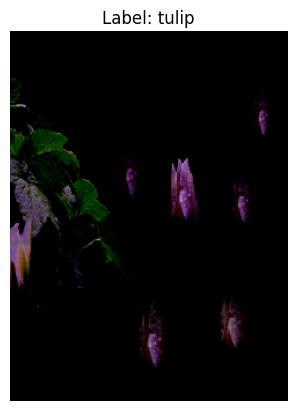

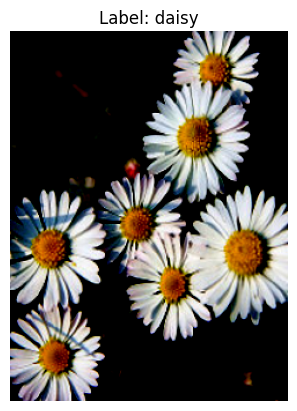

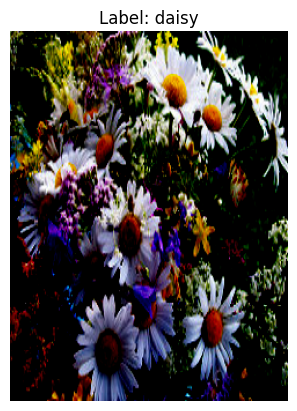

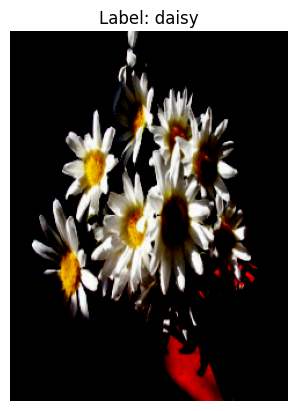

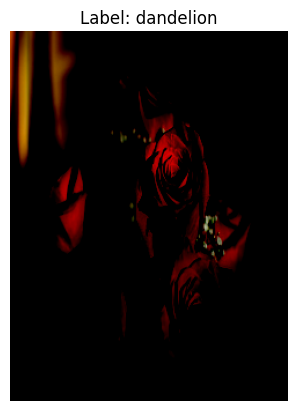

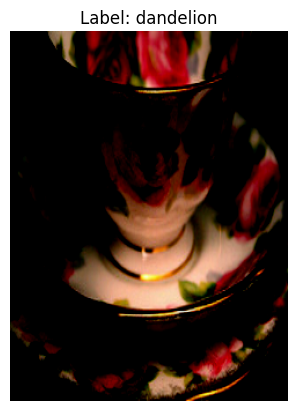

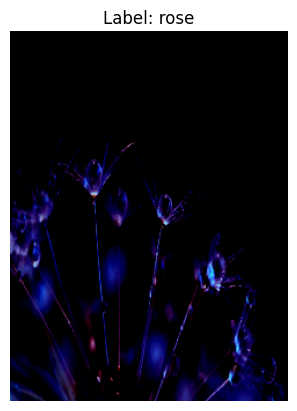

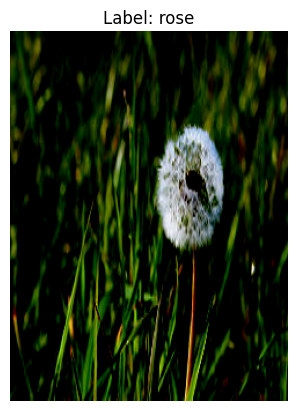

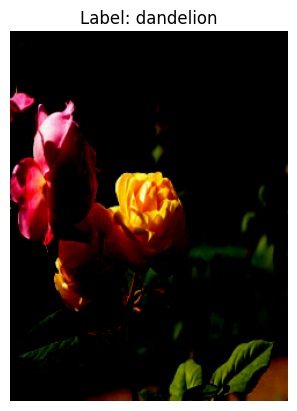

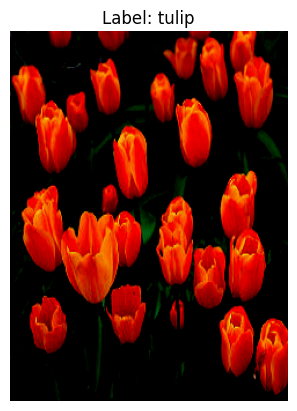

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Получение нескольких пакетов из train_loader
num_images = 10  # Количество изображений, которые нужно показать
count = 0

for images, labels in train_loader:
    # Показываем каждое изображение в пакете
    for i in range(len(images)):
        count += 1
        if count > num_images:
            break

        image = images[i].numpy()
        label = labels[i]

        # Преобразование изображения из тензора в массив NumPy и изменение его формы
        image = np.transpose(image, (1, 2, 0))

        # Отображение изображения
        plt.imshow(image)
        plt.title(f"Label: {classes[label]}")
        plt.axis('off')
        plt.show()

    if count > num_images:
        break


In [ ]:
next(iter(train_loader))[0].shape

torch.Size([4, 3, 320, 240])

In [ ]:
import torch.nn as nn
import torch.nn.functional as F  # Functional

In [ ]:
class MyConvNet(nn.Module):
    def __init__(self):
        # вызов конструктора предка
        super().__init__()
        # необходмо заранее знать, сколько каналов у картинки (сейчас = 1),
        # которую будем подавать в сеть, больше ничего
        # про входящие картинки знать не нужно
        #self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=11, stride = 4)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=64, kernel_size=5, padding = 2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding = 1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding = 1)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, padding = 1)
        self.pool = nn.MaxPool2d(kernel_size=3, stride=2)
        # self.bn1 = nn.BatchNorm2d(128)
        # self.bn2 = nn.BatchNorm2d(32)
        self.fc1 = nn.Linear(3072, 128)  # !!!
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.pool(x)

        # print(x.shape)
        x = x.view(-1, 3072)  # !!!
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
from tqdm import tqdm_notebook

In [ ]:
net = MyConvNet()

summary(net.cuda(), (3,320, 240))

batch = []


batch = next(iter(train_loader))

net.forward(torch.FloatTensor(batch[0]).cuda())

torch.Size([2, 64, 8, 6])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 78, 58]           5,824
         MaxPool2d-2           [-1, 16, 38, 28]               0
            Conv2d-3           [-1, 64, 38, 28]          25,664
         MaxPool2d-4           [-1, 64, 18, 13]               0
            Conv2d-5          [-1, 128, 18, 13]          73,856
            Conv2d-6          [-1, 128, 18, 13]         147,584
            Conv2d-7           [-1, 64, 18, 13]          73,792
         MaxPool2d-8             [-1, 64, 8, 6]               0
            Linear-9                  [-1, 128]         786,560
           Linear-10                   [-1, 32]           4,128
           Linear-11                    [-1, 5]             165
Total params: 1,117,573
Trainable params: 1,117,573
Non-trainable params: 0
----------------------------------------------------------------


tensor([[ 0.0365,  0.1475,  0.0176,  0.1055, -0.0452],
        [ 0.0370,  0.1475,  0.0175,  0.1056, -0.0446],
        [ 0.0367,  0.1463,  0.0190,  0.1068, -0.0441],
        [ 0.0370,  0.1472,  0.0195,  0.1067, -0.0448]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

<ipython-input-53-0671bd52808e>:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(15)):


  0%|          | 0/15 [00:00<?, ?it/s]

<ipython-input-53-0671bd52808e>:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate(tqdm_notebook(train_loader)):


  0%|          | 0/459 [00:00<?, ?it/s]

[1,   100] loss: 1.563
[1,   200] loss: 1.353
[1,   300] loss: 1.331
[1,   400] loss: 1.280


  0%|          | 0/459 [00:00<?, ?it/s]

[2,   100] loss: 1.217
[2,   200] loss: 1.147
[2,   300] loss: 1.094
[2,   400] loss: 1.152


  0%|          | 0/459 [00:00<?, ?it/s]

[3,   100] loss: 1.075
[3,   200] loss: 1.100
[3,   300] loss: 1.068
[3,   400] loss: 1.103


  0%|          | 0/459 [00:00<?, ?it/s]

[4,   100] loss: 1.083
[4,   200] loss: 0.997
[4,   300] loss: 0.982
[4,   400] loss: 1.073


  0%|          | 0/459 [00:00<?, ?it/s]

[5,   100] loss: 0.959
[5,   200] loss: 0.959
[5,   300] loss: 0.913
[5,   400] loss: 0.915


  0%|          | 0/459 [00:00<?, ?it/s]

[6,   100] loss: 0.891
[6,   200] loss: 0.875
[6,   300] loss: 0.886
[6,   400] loss: 0.835


  0%|          | 0/459 [00:00<?, ?it/s]

[7,   100] loss: 0.837
[7,   200] loss: 0.849
[7,   300] loss: 0.861
[7,   400] loss: 0.769


  0%|          | 0/459 [00:00<?, ?it/s]

[8,   100] loss: 0.792
[8,   200] loss: 0.830
[8,   300] loss: 0.752
[8,   400] loss: 0.771


  0%|          | 0/459 [00:00<?, ?it/s]

[9,   100] loss: 0.809
[9,   200] loss: 0.706
[9,   300] loss: 0.809
[9,   400] loss: 0.738


  0%|          | 0/459 [00:00<?, ?it/s]

[10,   100] loss: 0.719
[10,   200] loss: 0.720
[10,   300] loss: 0.677
[10,   400] loss: 0.747


  0%|          | 0/459 [00:00<?, ?it/s]

[11,   100] loss: 0.684
[11,   200] loss: 0.685
[11,   300] loss: 0.713
[11,   400] loss: 0.706


  0%|          | 0/459 [00:00<?, ?it/s]

[12,   100] loss: 0.641
[12,   200] loss: 0.657
[12,   300] loss: 0.678
[12,   400] loss: 0.644


  0%|          | 0/459 [00:00<?, ?it/s]

[13,   100] loss: 0.651
[13,   200] loss: 0.590
[13,   300] loss: 0.648
[13,   400] loss: 0.652


  0%|          | 0/459 [00:00<?, ?it/s]

[14,   100] loss: 0.603
[14,   200] loss: 0.562
[14,   300] loss: 0.623
[14,   400] loss: 0.627


  0%|          | 0/459 [00:00<?, ?it/s]

[15,   100] loss: 0.510
[15,   200] loss: 0.568
[15,   300] loss: 0.585
[15,   400] loss: 0.554


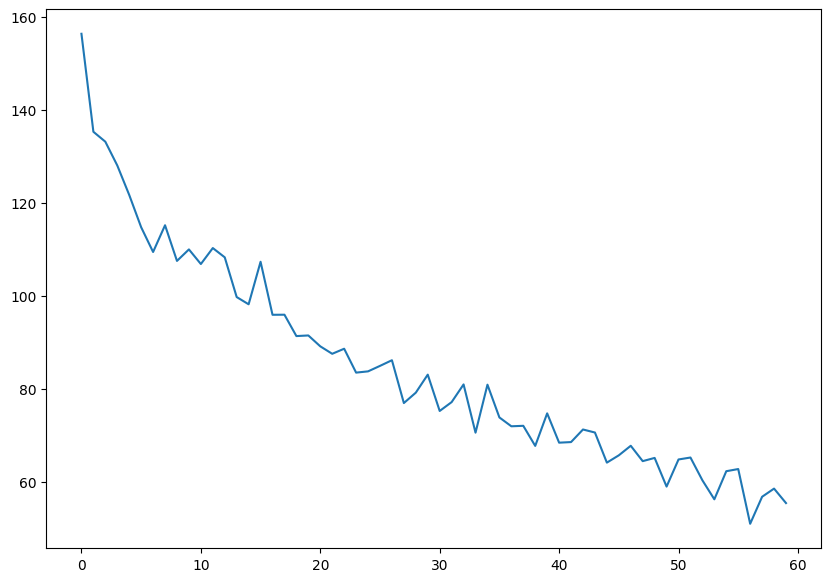

Обучение закончено


In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

net = MyConvNet().to(device)

loss_fn = torch.nn.CrossEntropyLoss()

losses = []

learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# итерируемся
for epoch in tqdm_notebook(range(15)):

    running_loss = 0.0
    for i, batch in enumerate(tqdm_notebook(train_loader)):
        # так получаем текущий батч
        X_batch, y_batch = batch

        # обнуляем веса
        optimizer.zero_grad()

        # forward + backward + optimize
        y_pred = net(X_batch.to(device))
        loss = loss_fn(y_pred, y_batch.to(device))
        loss.backward()
        optimizer.step()

        # выведем текущий loss
        running_loss += loss.item()
        # выводем качество каждые 100 батчей
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            losses.append(running_loss)
            running_loss = 0.0
ax.clear()
ax.plot(np.arange(len(losses)), losses)
plt.show()
folder_path = '/content/drive/My Drive/DataSets/Models'  # Укажите путь к папке
os.makedirs(folder_path, exist_ok=True)

# Сохранение модели
model_path = os.path.join(folder_path, 'model_flower_3.pth')
torch.save(net.state_dict(), model_path)
print('Обучение закончено')

In [ ]:
class_correct = list(0. for i in range(5))
class_total = list(0. for i in range(5))

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        y_pred = net(images.to(device))#.view(4, -1))
        _, predicted = torch.max(y_pred, 1)
        c = (predicted.cpu().detach() == labels).squeeze()
        for i in range(8):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(5):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of tulip : 68 %
Accuracy of  rose : 82 %
Accuracy of dandelion : 78 %
Accuracy of sunflower : 91 %
Accuracy of daisy : 47 %


In [ ]:
torch.cuda.empty_cache()

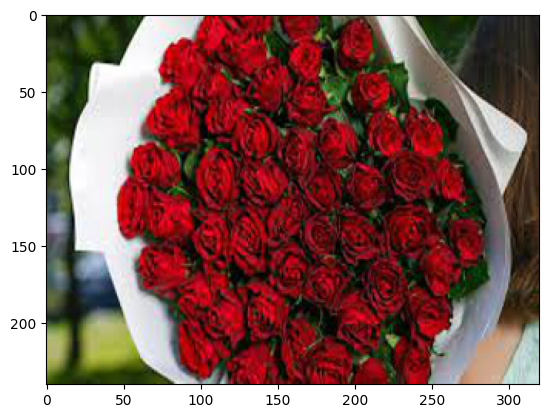

Predicted class: rose


In [ ]:
from PIL import Image

# Загрузка и преобразование изображения
image_path = '/content/drive/My Drive/DataSets/testPhoto/rose4.jpg'
image = Image.open(image_path)
image = image.resize((320,240))

# Применение необходимых преобразований, таких как изменение размера и нормализация
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Применение необходимых преобразований, таких как изменение размера и нормализация
image_transformed = transform(image)

# Преобразование изображения в тензор PyTorch
image_tensor = image_transformed.unsqueeze(0).to(device)
# Классификация изображения
with torch.no_grad():
    outputs = net(image_tensor)
    _, predicted = torch.max(outputs, 1)

# # Получение предсказанного класса
predicted_class = predicted.item()
predicted_label = classes[predicted_class]

plt.imshow(image)
plt.show()
print('Predicted class: {}'.format(predicted_label))


In [ ]:
folder_path = '/content/drive/My Drive/DataSets/Models'  # Укажите путь к папке
os.makedirs(folder_path, exist_ok=True)

# Сохранение модели
model_path = os.path.join(folder_path, 'model.pth')
torch.save(net.state_dict(), model_path)


In [ ]:
net = MyConvNet()  # Создайте экземпляр вашего класса модели
net.load_state_dict(torch.load("/content/drive/My Drive/DataSets/Models/model.pth", map_location=device))
net.eval()  # eval для например, BatchNorm или Dropout)
net = net.to(device)